# ロジスティックモデル

正規累積モデルは累積分布関数を使うため、コンピュータで積分計算をするのがやや難しいという問題がある。そこでロジスティック分布に置き換えたものが使われる。

ロジスティック分布の確率密度関数と累積分布関数は

$$
f(x)=\frac{\exp (-x)}{[1+\exp (-x)]^2}, \quad F(x)=\frac{1}{1+\exp (-x)}
$$

となる。とくに$x$を約1.7倍したロジスティック分布は累積分布関数が正規分布と非常に近くなることが知られている。

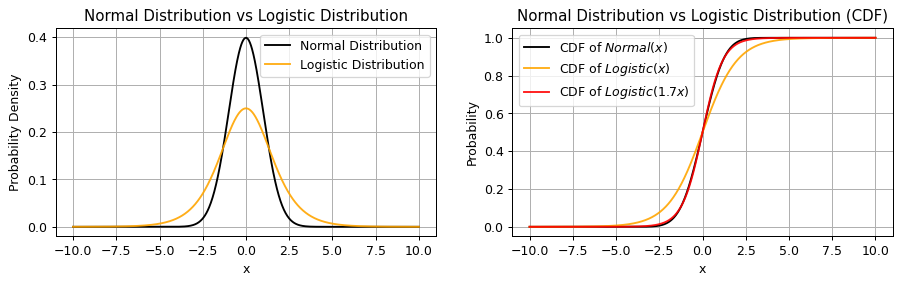

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, logistic
x = np.linspace(-10, 10, 1000)

fig, axes = plt.subplots(figsize=[12, 3], dpi=90, ncols=2)
ax = axes[0]
ax.plot(x, norm.pdf(x), 'k-', label='Normal Distribution')
ax.plot(x, logistic.pdf(x),  'orange', alpha=0.9, label='Logistic Distribution')

ax.set_title('Normal Distribution vs Logistic Distribution')
ax.set_xlabel('x')
ax.set_ylabel('Probability Density')
ax.legend()
ax.grid(True)

ax = axes[1]
ax.plot(x, norm.cdf(x), 'k-', label=r'CDF of $Normal(x)$')
ax.plot(x, logistic.cdf(x), 'orange', alpha=0.9, label=r'CDF of $Logistic(x)$')
ax.plot(x, logistic.cdf(x * 1.704), 'red', alpha=0.9, label=r'CDF of $Logistic(1.7 x)$')
ax.set_title('Normal Distribution vs Logistic Distribution (CDF)')
ax.set_xlabel('x')
ax.set_ylabel('Probability')
ax.legend()
ax.grid(True)
plt.show()

## 1PLモデル（ラッシュモデル）

正規分布の代わりにロジスティック分布を使った **1パラメータ・ロジスティック（1PL）モデル** は以下のように表される。

:::{admonition} 1PLモデル

$$
P(y_{ij} = 1)
= \frac{1}{1+ \exp(-D a ( \theta_i - b_j))}
$$

- $a$：識別力（全項目で共通）
    - $a=1$とおく定義もある
- $b_j$：項目困難度

:::

※なお$D$はロジスティック・シグモイド関数を正規累積モデルの関数に近づけるための定数（通常は$D=1.7$か$D=1$にする）なので、正規累積モデルと比較する必要がなければ不要（$D=1$でいい）。


1PLモデルは **ラッシュモデル（Rasch model）** とも呼ばれる。Raschという人がIRTとは独立に1PLモデルを提案していたため。



## 2PLモデル

正規分布の代わりにロジスティック分布を使った **2パラメータロジスティック（2PL）モデル** は以下のように表される。

:::{admonition} 2PLモデル

$$
P(y_{ij} = 1)
= \frac{1}{1+ \exp(-D a_j ( \theta_i - b_j))}
$$

- $a_j$：項目識別力
- $b_j$：項目困難度
:::


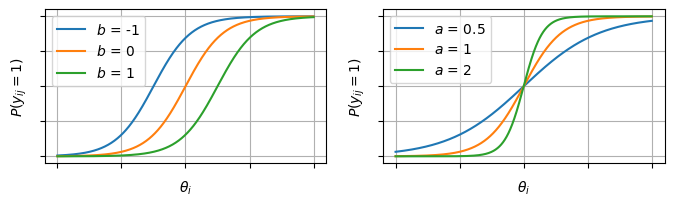

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
theta = np.linspace(-4, 4, 1000)

fig, axes = plt.subplots(figsize=[8, 2], ncols=2)

def icc(theta, a, b):
    z = 1.7 * a * (theta - b)
    return 1 / (1 + np.exp(-z))

a = 1
for b in [-1, 0, 1]:
    axes[0].plot(theta, icc(theta, a, b), label=r"$b$ = " + f"{b}")
axes[0].set(xlabel=r"$\theta_i$", ylabel=r"$P(y_{ij} = 1)$", xticklabels=[], yticklabels=[])
axes[0].legend()
axes[0].grid(True)

b = 0
for a in [0.5, 1, 2]:
    axes[1].plot(theta, icc(theta, a, b), label=r"$a$ = " + f"{a}")
axes[1].set(xlabel=r"$\theta_i$", ylabel=r"$P(y_{ij} = 1)$", xticklabels=[], yticklabels=[])
axes[1].legend()
axes[1].grid(True)

## 3PLモデル

例えば4択問題では、正解がわからなくて適当に選んだとしても1/4は当たることになる。こうした影響を「当て推量」パラメータ$c_j$として取り入れたモデル。

:::{admonition} 3PLモデル

$$
P(y_{ij} = 1)
= c_j + \frac{1 - c_j}{1 - \exp\big(-a_j ( \theta_i - b_j) \big)}
$$

- $a_j$：項目識別力
- $b_j$：項目困難度
- $c_j$：当て推量
:::

$c_j$は項目特性曲線の下限となる。$\theta_i$がどんなに低い人でも必ず$c_j$以上の$P(y_{ij} = 1)$になるということ。

## 4PLモデル

項目特性曲線の上限を表すパラメータ$d_j$を追加したもの。$\theta_i$がどんなに高い人でも100%の正答率にはできない高難度な状況（運ゲー）を想定したモデル。

:::{admonition} 4PLモデル

$$
P(y_{ij} = 1)
= c_j + \frac{d_j - c_j}{1 - \exp\big(-a_j ( \theta_i - b_j) \big)}
$$

- $a_j$：項目識別力
- $b_j$：項目困難度
- $c_j$：当て推量。項目特性曲線の下限
- $d_j$：項目特性曲線の上限
:::

4PLMになるとかなりモデルが複雑になりパラメータの推定も不安定になるので、1~3PLMほど一般的ではない。対応していないライブラリも多い。

## 5PLモデル

「非対称性」のパラメータ$e_j$を追加したもの。4PLまでは項目特性曲線の動き方が0.5を中心に対称になっている。5PLでは「最初は$\theta_i$があがるほど急激に$P(y_{ij}=1)$が上がるが、徐々に上がりにくくなる」などの状況を表すことができる。

:::{admonition} 5PLモデル

$$
P(y_{ij} = 1)
= c_j + \frac{d_j - c_j}{\left[ 1 - \exp\big(-a_j ( \theta_i - b_j) \big) \right]^{e_j}}
$$

- $a_j$：項目識別力
- $b_j$：項目困難度
- $c_j$：当て推量。項目特性曲線の下限
- $d_j$：項目特性曲線の上限
- $e_j$：非対称性
:::

## 実装例

In [90]:
# サンプルデータの生成
import numpy as np
import pandas as pd

def simulate_2pl(
    N=1000,  # 受験者数
    J=20,    # 項目数
    mu_a=0.0,
    sigma_a=0.3,
    mu_b=0.0,
    sigma_b=1.0,
    seed=42,
):
    rng = np.random.default_rng(seed)
    theta = rng.normal(0, 1, size=N)
    a = rng.lognormal(mean=mu_a, sigma=sigma_a, size=J)
    b = rng.normal(mu_b, sigma_b, size=J)
    eta = a[None, :] * (theta[:, None] - b[None, :])
    p = 1 / (1 + np.exp(-eta))
    U = rng.binomial(1, p) # 反応行列
    return {
        "U": U,
        "theta": theta,
        "a": a,
        "b": b,
        "p": p,
    }

num_users = 1000
num_items = 20
data = simulate_2pl(N=num_users, J=num_items)

df = pd.DataFrame(data["U"],
                  index=[f"user_{i+1}" for i in range(num_users)],
                  columns=[f"question_{j+1}" for j in range(num_items)])

df.head()

,question_1,question_2,question_3,question_4,question_5,question_6,question_7,question_8,question_9,question_10,question_11,question_12,question_13,question_14,question_15,question_16,question_17,question_18,question_19,question_20
user_1,0,1,0,1,1,1,1,0,0,1,1,0,0,0,1,1,0,1,0,0
user_2,0,0,1,0,1,0,1,1,1,0,0,0,0,1,0,0,0,1,1,1
user_3,1,1,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0,1,1,0
user_4,1,1,1,1,1,1,1,0,0,0,0,1,0,1,0,1,1,1,1,1
user_5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


<Axes: xlabel='raw_score', ylabel='Count'>

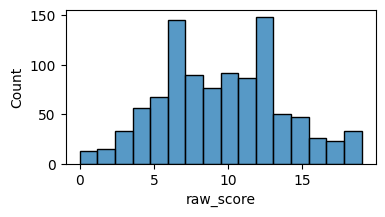

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

df["raw_score"] = df.sum(axis=1)

fig, ax = plt.subplots(figsize=[4,2])
sns.histplot(data=df, x="raw_score", ax=ax)

/tmp/ipykernel_15147/2308563096.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d = df.groupby("raw_score_cat")[item_col].mean().reset_index()


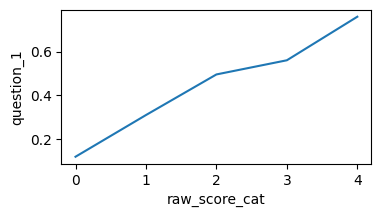

In [82]:
df["raw_score_cat"] = pd.qcut(df["raw_score"], q=5, duplicates="drop")

item_col = "question_1"
d = df.groupby("raw_score_cat")[item_col].mean().reset_index()
d["raw_score_cat"] = d["raw_score_cat"].cat.codes
fig, ax = plt.subplots(figsize=[4,2])
sns.lineplot(x="raw_score_cat", y=item_col, data=d, ax=ax)

del df["raw_score"]
del df["raw_score_cat"]

In [83]:
# 縦持ちへ変換
df_long = pd.melt(
    df.reset_index(),
    id_vars="index",
    var_name="item",
    value_name="response",
).rename(columns={"index": "user"})
df_long.head()

,user,item,response
0,user_1,question_1,0
1,user_2,question_1,0
2,user_3,question_1,1
3,user_4,question_1,1
4,user_5,question_1,0


#### モデルの定義

注意点として、$a$に非負制約をかけないとMCMCが収束しにくい（$\theta-b$の値と$a$の値次第で同値の尤度が出てきて一意に決まらないので）

`pm.LogNormal(mu=0.0, sigma=np.sqrt(0.5))` や `pm.HalfNormal` などが使われる事が多い様子


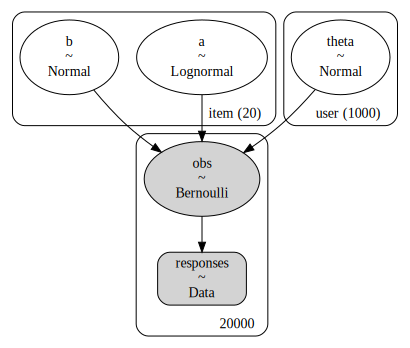

In [84]:
# indexと値の取得
user_idx, users = pd.factorize(df_long["user"])
item_idx, items = pd.factorize(df_long["item"])
responses = df_long["response"].to_numpy()

import pymc as pm
coords = {"user": df.index, "item": df.columns}
model = pm.Model(coords=coords)
with model:
    # 観測値の配列
    response_obs = pm.Data("responses", responses)
    # 2PLM
    a = pm.LogNormal("a", mu=0.0, sigma=np.sqrt(0.5), dims="item")
    b = pm.Normal("b", mu=0.0, sigma=1.0, dims="item")
    theta = pm.Normal("theta", mu=0.0, sigma=1.0, dims="user")
    obs = pm.Bernoulli("obs", p=pm.math.sigmoid(a[item_idx] * (theta[user_idx] - b[item_idx])), observed=response_obs)

g = pm.model_to_graphviz(model)
g

#### 推定

In [85]:
%%time
with model:
    idata = pm.sample(random_seed=0, draws=1000)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a, b, theta]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 28 seconds.


CPU times: user 5.73 s, sys: 757 ms, total: 6.49 s
Wall time: 30.1 s


### EAP推定量

In [86]:
post_mean = idata.posterior.mean(dim=["chain", "draw"])

# 項目パラメータのEAP推定量
params_EAP = pd.DataFrame({
    "item": coords["item"],
    "a": post_mean["a"],
    "b": post_mean["b"],
})
params_EAP.head()

,item,a,b
0,question_1,1.026006,0.351814
1,question_2,0.995702,0.360068
2,question_3,0.674935,0.582219
3,question_4,1.062443,0.673847
4,question_5,0.993870,-2.049681


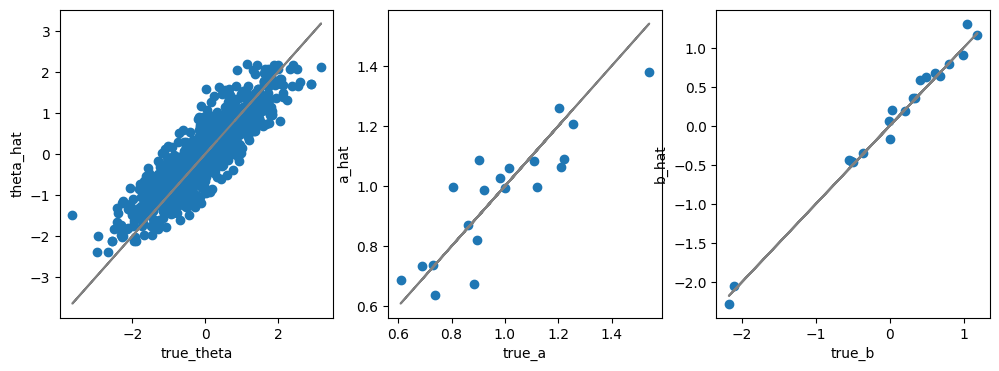

In [88]:
fig, axes = plt.subplots(figsize=[12,4], ncols=3)

ax = axes[0]
ax.scatter(data["theta"], post_mean["theta"])
ax.plot(data["theta"], data["theta"], color="gray")
_ = ax.set(xlabel="true_theta", ylabel="theta_hat")

ax = axes[1]
ax.scatter(data["a"], post_mean["a"])
ax.plot(data["a"], data["a"], color="gray")
_ = ax.set(xlabel="true_a", ylabel="a_hat")

ax = axes[2]
ax.plot(data["b"], data["b"], color="gray")
ax.scatter(data["b"], post_mean["b"])
_ = ax.set(xlabel="true_b", ylabel="b_hat")